In [1]:
# @title Extracting and Reading Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/Raw_Data/'

cpi = pd.read_csv(path + 'CPIAUCSL.csv', parse_dates=['observation_date'], index_col='observation_date')
fed = pd.read_csv(path + 'FEDFUNDS.csv', parse_dates=['observation_date'], index_col='observation_date')
wages = pd.read_csv(path + 'CES0500000003.csv', parse_dates=['observation_date'], index_col='observation_date')
unemployment = pd.read_csv(path + 'UNRATE.csv', parse_dates=['observation_date'], index_col='observation_date')
savings = pd.read_csv(path + 'PSAVERT.csv', parse_dates=['observation_date'], index_col='observation_date')
pce = pd.read_csv(path + 'PCE.csv', parse_dates=['observation_date'], index_col='observation_date')
investment = pd.read_csv(path + 'GPDI.csv', parse_dates=['observation_date'], index_col='observation_date')
gdp = pd.read_csv(path + 'GDP.csv', parse_dates=['observation_date'], index_col='observation_date')

cpi.columns = ['CPI']
fed.columns = ['Federal Funds Rate']
wages.columns = ['Average Hourly Earnings']
unemployment.columns = ['Unemployment']
savings.columns = ['Personal Savings Rate']
pce.columns = ['PCE']
investment.columns = ['GPDI']
gdp.columns = ['GDP']

df = cpi.join([fed, wages, unemployment, savings, pce, investment, gdp])
df.dropna(inplace=True)

df = df[df.index >= '2006-04-01']
df['GDP'] = df['GDP'].ffill()
df['GPDI'] = df['GPDI'].ffill()

df.head()

,CPI,Federal Funds Rate,Average Hourly Earnings,Unemployment,Personal Savings Rate,PCE,GPDI,GDP
observation_date,,,,,,,,
2006-04-01,200.700,4.79,20.15,4.7,3.1,9191.6,2709.252,13753.424
2006-07-01,202.900,5.24,20.29,4.7,2.3,9343.8,2709.420,13870.188
2006-10-01,201.900,5.25,20.42,4.4,2.4,9393.6,2675.406,14039.560
2007-01-01,203.437,5.25,20.59,4.6,2.4,9538.7,2664.295,14215.651
2007-04-01,205.904,5.25,20.77,4.5,3.0,9643.6,2699.217,14402.082


**Note on Shaded Regions:**

Red and purple shaded areas represent U.S. recession periods:
- 🔴 December 2007 – June 2009 (Global Financial Crisis)
- 🟣 February 2020 – April 2020 (COVID-19 Recession)

These are visual markers to help interpret shifts in the macroeconomic indicators.

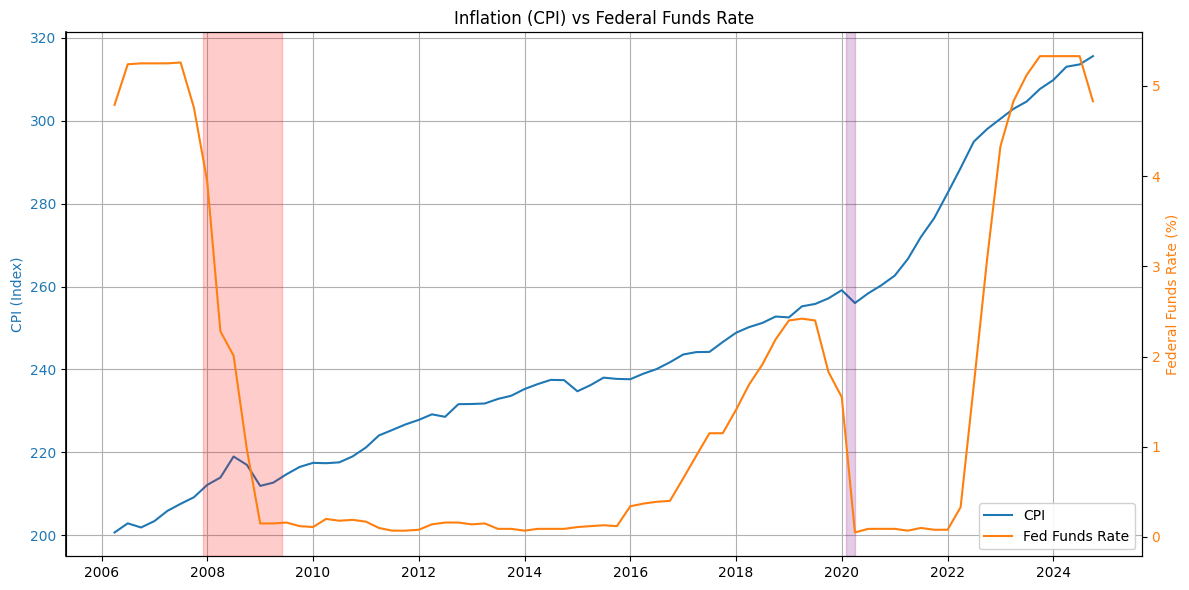

In [ ]:
# @title Inflation (CPI) vs Interest Rate (Federal Funds Rate)
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Inflation (CPI) vs Federal Funds Rate')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Federal Funds Rate (%)', color='tab:orange')
line2 = ax2.plot(df.index, df['Federal Funds Rate'], color='tab:orange', label='Fed Funds Rate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines, labels = line1 + line2, ['CPI', 'Fed Funds Rate']
ax1.legend(lines, labels, loc='lower right', framealpha=0.9, facecolor='white')


fig.tight_layout()
plt.show()

**Inflation (CPI) vs Federal Funds Rate**

This chart shows the relationship between the U.S. inflation index (CPI) and the Federal Funds Rate over time. Notably, interest rates remained low following the 2008 recession, with sharp increases starting in 2022 in response to rising inflation.


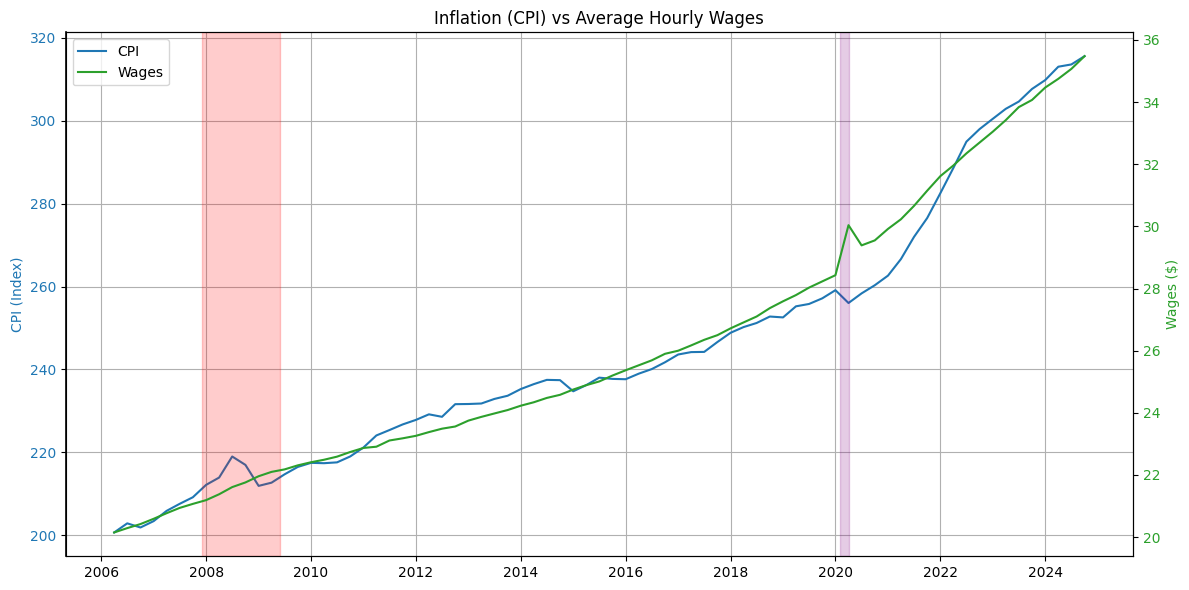

In [ ]:
# @title Inflation (CPI) vs Average Hourly Wages
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Inflation (CPI) vs Average Hourly Wages')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Wages ($)', color='tab:green')
line2 = ax2.plot(df.index, df['Average Hourly Earnings'], color='tab:green', label='Wages')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines, labels = line1 + line2, ['CPI', 'Wages']
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()


**Inflation (CPI) vs Average Hourly Wages**

While both CPI and wages show upward trends, wages increased more slowly than inflation during 2021–2023, suggesting reduced real income growth.


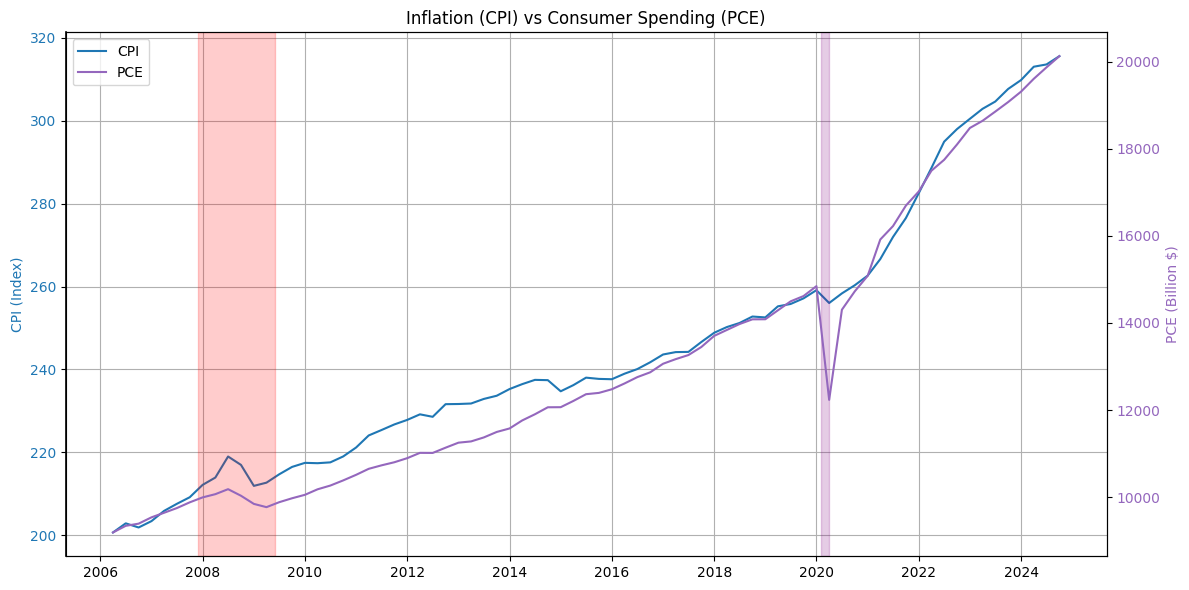

In [ ]:
# @title Inflation (CPI) vs Consumer Spending (PCE)
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Inflation (CPI) vs Consumer Spending (PCE)')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('PCE (Billion $)', color='tab:purple')
line2 = ax2.plot(df.index, df['PCE'], color='tab:purple', label='PCE')
ax2.tick_params(axis='y', labelcolor='tab:purple')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines, labels = line1 + line2, ['CPI', 'PCE']
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()


**Inflation (CPI) vs Consumer Spending (PCE)**

Consumer spending continued to rise alongside inflation, with a brief dip during COVID-19. The shaded regions indicate recession periods.


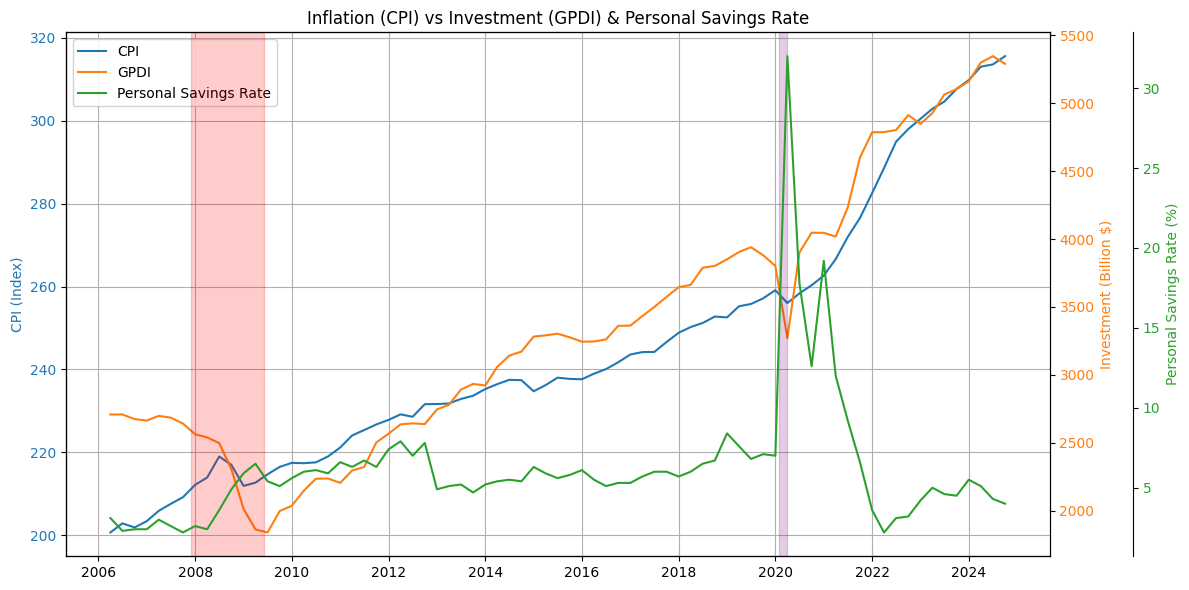

In [ ]:
# @title Inflation (CPI) vs Investment (GPDI) & Personal Savings Rate
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Inflation (CPI) vs Investment (GPDI) & Personal Savings Rate')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Investment (Billion $)', color='tab:orange')
ax2.plot(df.index, df['GPDI'], color='tab:orange', label='GPDI')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))
ax3.set_ylabel('Personal Savings Rate (%)', color='tab:green')
ax3.plot(df.index, df['Personal Savings Rate'], color='tab:green', label='Personal Savings Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2, label='2008 Recession')
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2, label='COVID Recession')

lines_all = ax1.get_lines() + ax2.get_lines() + ax3.get_lines()
labels_all = [line.get_label() for line in lines_all]

filtered_lines = []
filtered_labels = []

for line, label in zip(lines_all, labels_all):
    if label and not ('Recession' in label or label.startswith('_')):
        filtered_lines.append(line)
        filtered_labels.append(label)

ax1.legend(filtered_lines, filtered_labels, loc='upper left', framealpha=0.9, facecolor='white')


fig.tight_layout()
plt.show()

**Inflation (CPI) vs Investment (GPDI) and Personal Savings Rate**

Investment (orange) dropped during recession periods, especially in 2008 and 2020, while the savings rate (green) spiked briefly during the COVID recession.


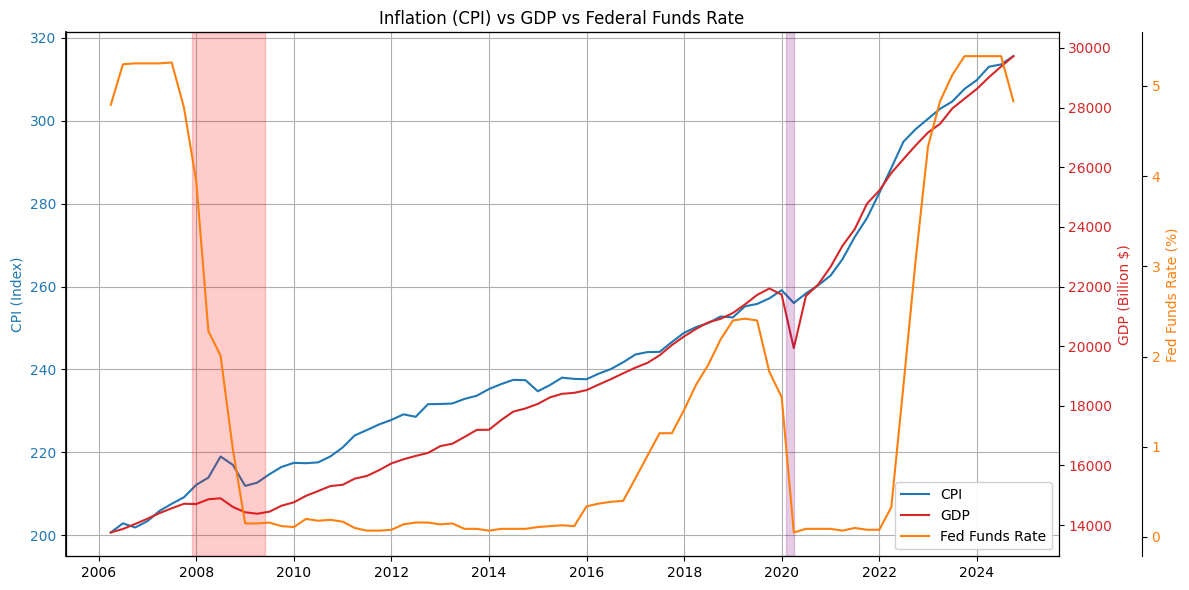

In [ ]:
# @title Inflation (CPI) vs GDP vs Federal Funds Rate
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Inflation (CPI) vs GDP vs Federal Funds Rate')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billion $)', color='tab:red')
line2 = ax2.plot(df.index, df['GDP'], color='tab:red', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))
ax3.set_ylabel('Fed Funds Rate (%)', color='tab:orange')
line3 = ax3.plot(df.index, df['Federal Funds Rate'], color='tab:orange', label='Fed Funds Rate')
ax3.tick_params(axis='y', labelcolor='tab:orange')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines_all = line1 + line2 + line3
labels_all = ['CPI', 'GDP', 'Fed Funds Rate']
ax1.legend(lines_all, labels_all, loc='lower right', framealpha=0.9, facecolor='white')

fig.tight_layout()
plt.show()


**Inflation (CPI) vs GDP vs Federal Funds Rate**

This macro-level overview shows how GDP and inflation rise together in the long run, while interest rates are adjusted cyclically by the Fed to manage inflation.


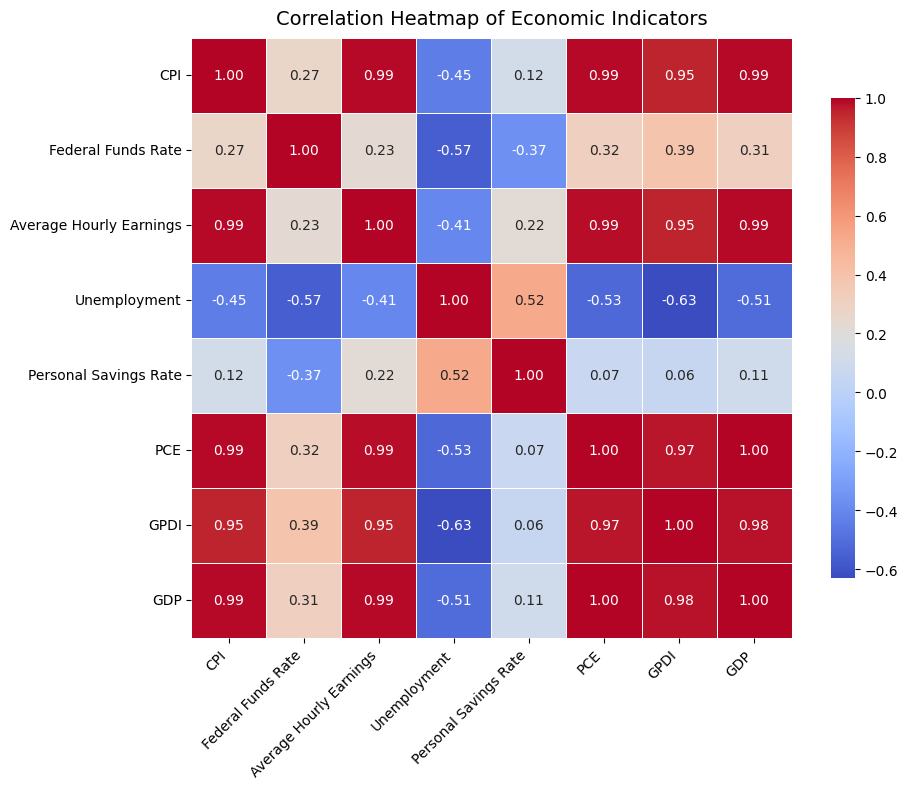

In [ ]:
# @title Heatmap of all Factors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Heatmap of Economic Indicators", fontsize=14, pad=10)
plt.xticks(rotation=45, ha='right')  # rotate with right alignment
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Correlation Heatmap of Economic Indicators**

This heatmap shows the pairwise correlation between key U.S. macroeconomic variables from 2006 to 2025. Strong positive correlations are observed between GDP, CPI, investment (GPDI), and consumer spending (PCE), indicating synchronized economic expansion during growth periods. Wages also show a strong positive correlation with inflation, suggesting nominal income rises alongside prices. As expected, unemployment has a negative correlation with most growth indicators. These relationships reflect typical macroeconomic dynamics during inflationary and recessionary periods.


In [6]:
# @title Hypothesis Testing (Spearman Correlation)

from scipy.stats import spearmanr, ttest_rel

# Spearman Correlation Test Function
def test_spearman(x, y, name_x, name_y):
    corr, p = spearmanr(x, y)
    significance = "✅ Significant" if p < 0.05 else "❌ Not Significant"
    direction = "Negative" if corr < 0 else "Positive"
    print(f"\n{name_x} vs {name_y}")
    print(f"- Spearman Correlation: {corr:.3f} ({direction})")
    print(f"- P-value: {p:.5f}")
    print(f"- {significance} correlation")

# 1. CPI vs Consumer Spending (PCE)
test_spearman(df['CPI'], df['PCE'], 'CPI', 'Consumer Spending (PCE)')

# 2. CPI vs Investment (GPDI)
test_spearman(df['CPI'], df['GPDI'], 'CPI', 'Investment (GPDI)')

# 3. CPI vs Unemployment
test_spearman(df['CPI'], df['Unemployment'], 'CPI', 'Unemployment Rate')

# 4. CPI vs Wages: Paired Growth Comparison
print("\nCPI vs Wages: Growth Comparison")
cpi_growth = ((df['CPI'].iloc[-1] - df['CPI'].iloc[0]) / df['CPI'].iloc[0]) * 100
wage_growth = ((df['Average Hourly Earnings'].iloc[-1] - df['Average Hourly Earnings'].iloc[0]) / df['Average Hourly Earnings'].iloc[0]) * 100
print(f"- CPI Growth: {cpi_growth:.2f}%")
print(f"- Wages Growth: {wage_growth:.2f}%")

# Paired t-test on percent changes
cpi_change = df['CPI'].pct_change().dropna()
wage_change = df['Average Hourly Earnings'].pct_change().dropna()
min_len = min(len(cpi_change), len(wage_change))

t_stat, p_val = ttest_rel(cpi_change[:min_len], wage_change[:min_len])
significance = "Significant" if p_val < 0.05 else "No Significant"
print(f"- T-statistic: {t_stat:.3f}")
print(f"- P-value: {p_val:.5f}")
print(f"- {significance} difference in growth")



CPI vs Consumer Spending (PCE)
- Spearman Correlation: 0.994 (Positive)
- P-value: 0.00000
- ✅ Significant correlation

CPI vs Investment (GPDI)
- Spearman Correlation: 0.931 (Positive)
- P-value: 0.00000
- ✅ Significant correlation

CPI vs Unemployment Rate
- Spearman Correlation: -0.572 (Negative)
- P-value: 0.00000
- ✅ Significant correlation

CPI vs Wages: Growth Comparison
- CPI Growth: 57.23%
- Wages Growth: 76.08%
- T-statistic: -1.195
- P-value: 0.23583
- Not Significant difference in growth


## Hypothesis Testing Summary (Spearman Correlation)

**1. CPI vs Consumer Spending (PCE):**  
 -- A Spearman correlation showed a very strong positive relationship (ρ = 0.994, p = 0.00000), indicating that as inflation rises, nominal consumer spending also increases significantly.

**2. CPI vs Investment (GPDI):**  
-- A Spearman correlation revealed a strong positive relationship
(ρ = 0.931, p = 0.00000). This suggests business investment tends
to rise alongside inflation, especially during expansionary periods.

**3. CPI vs Unemployment Rate:**  
-- A moderate negative correlation was found (ρ = –0.572, p = 0.00000),
confirming the classic inverse relationship: inflation tends to rise
when unemployment falls.

**4. CPI vs Wages:**  
-- CPI increased by 57.23%, wages increased by 76.08%. However, a
paired t-test on monthly percentage changes showed no statistically
significant difference (p = 0.23583), meaning wage growth and
inflation moved similarly over time.



In [13]:
# @title Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature + target
X = df[['Federal Funds Rate', 'Average Hourly Earnings', 'Unemployment',
        'Personal Savings Rate', 'PCE', 'GPDI', 'GDP']]
y = df['CPI']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Linear Regression Results:
R² Score: 0.4049
MAE: 10.29
RMSE: 11.79


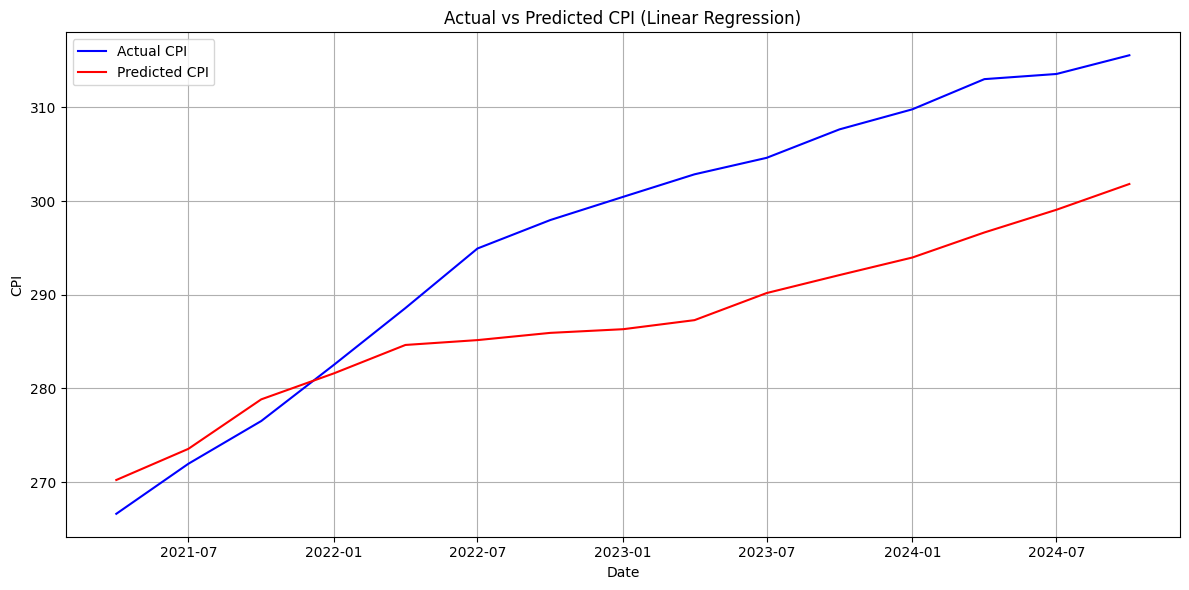

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual CPI', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted CPI', color='red')
plt.title('Actual vs Predicted CPI (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Linear Regression Model: Predicting CPI

I applied a Linear Regression model to predict inflation (CPI) using multiple macroeconomic indicators including wages, unemployment, interest rates, personal savings, investment, consumer spending, and GDP.

After splitting the dataset into training and testing sets (80/20, no shuffle to preserve time order), the model was trained on past data to learn the relationships between CPI and the selected features.

The model achieved the following results:
- **R² Score**: 0.4049 — The model explains about 40% of the variation in CPI values on unseen data.
- **MAE**: 10.29 — On average, predictions were off by about 10.29 CPI units.
- **RMSE**: 11.79 — Slightly higher due to penalizing larger errors more strongly.

The graph above shows that the predicted CPI follows the general upward trend of actual CPI but tends to **underestimate** values in the later periods. This may be due to the model's assumption of linearity and inability to fully capture more complex economic dynamics such as shocks or nonlinear interactions.

Despite the limitations, Linear Regression provides a strong and interpretable baseline model for inflation prediction.

In [14]:
# @title Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest Regression Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")


Random Forest Regression Results:
R² Score: -5.7893
MAE: 36.62
RMSE: 39.84


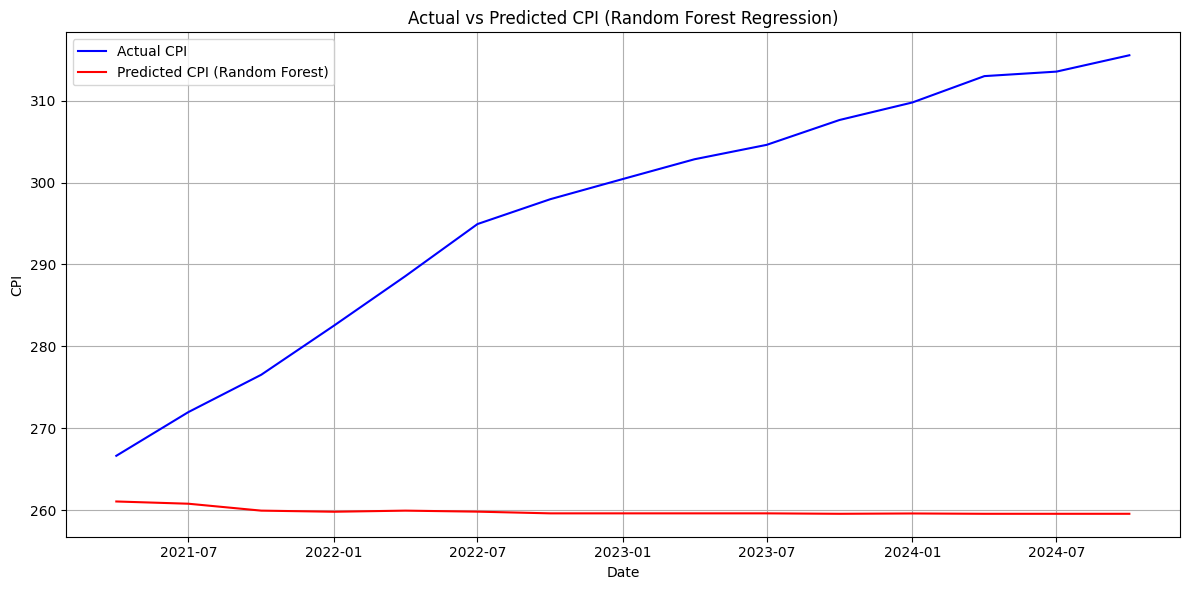

In [10]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual CPI', color='blue')
plt.plot(y_test.index, rf_pred, label='Predicted CPI (Random Forest)', color='red')
plt.title('Actual vs Predicted CPI (Random Forest Regression)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Random Forest Regression Results

Here, I tried using a Random Forest model to improve CPI predictions by capturing more complex patterns in the data. The model used indicators like wages, unemployment, investment, and consumer spending to predict next month's inflation.

However, the model performed poorly, giving a negative R² score. This means it did worse than just guessing the average CPI.

There are a few reasons for this:
- Our test set was small, and it included recent months with big CPI jumps. Something the model had never seen before.
- Inflation is very hard to predict using just a few economic indicators. Real-world CPI is influenced by many other things like global events, supply shocks, and government policy — none of which are in our dataset.

- The poor performance was also affected by the fact that the test data included periods of major economic shocks like the 2008 recession and COVID-19. These unusual events caused inflation to behave very differently, and the model struggled to make accurate predictions in such unpredictable conditions.



KNN Regression Results:
R² Score: -5.6712
MAE: 36.41
RMSE: 39.49


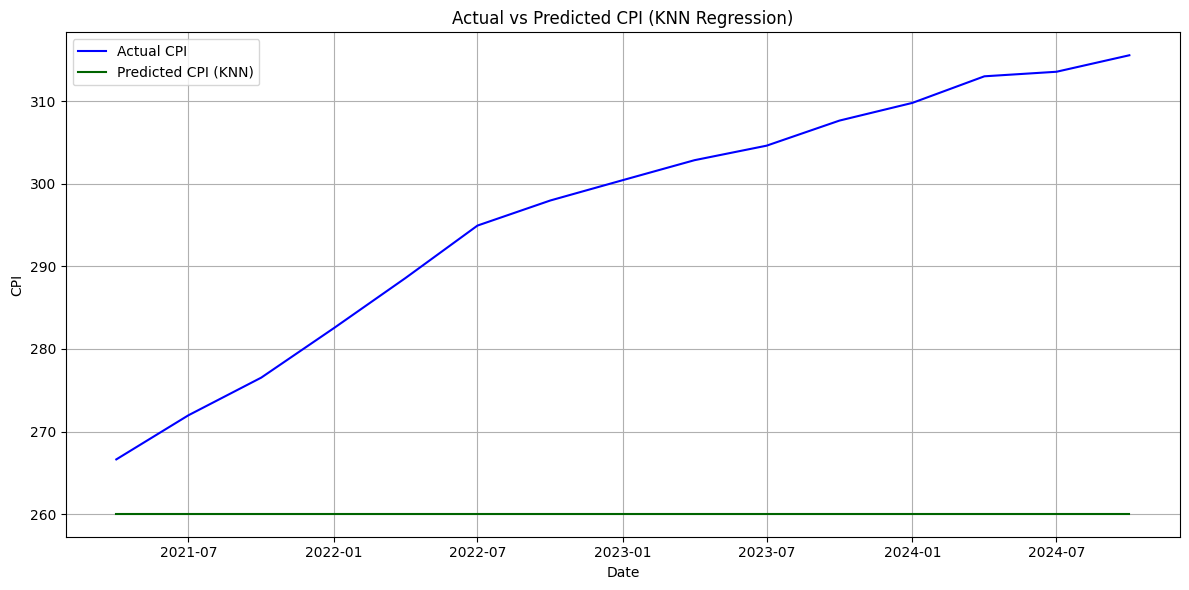

In [12]:
# @title KNN Regression Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Features and target (same as before)
X = df[['Federal Funds Rate', 'Average Hourly Earnings', 'Unemployment',
        'Personal Savings Rate', 'PCE', 'GPDI', 'GDP']]
y = df['CPI']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit KNN model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("KNN Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual CPI', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted CPI (KNN)', color='darkgreen')
plt.title('Actual vs Predicted CPI (KNN Regression)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## K-Nearest Neighbors (KNN) Regression Summary

Unfortunately, the model performed poorly yet again, yielding an R² score of –5.67 with high MAE and RMSE values.

KNN regression typically works well when the data points are densely clustered and follow smooth, local patterns, which is rarely the case in macroeconomic data. CPI is influenced by a wide range of complex and sometimes delayed interactions between variables, which KNN may fail to capture due to its reliance on distance-based similarity.

Additionally, the presence of outliers, sudden macroeconomic shocks (like recessions), and the small test size further limited its predictive power. This highlights the difficulty of modeling inflation with simple models when working with economic time series data.
